<a href="https://colab.research.google.com/github/AfamO/ghw-sentiment-analysis/blob/main/sentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Sentiment Analysis Using Spacy and  Amazon Product  Review Dataset

**Import some other libraries not already imported by kaggle**

In [12]:
import string
import re
import math
import matplotlib.pyplot as plt

**Now import Amazon product review dataset and display the dataset subsequently**

In [13]:
url = "https://drive.google.com/file/d/1I3j01ASl4PmXqqt5GhBDjSV6vfP5Nhvq/view?usp=sharing";
#review = pd.read_csv('https://drive.google.com/file/d/1I3j01ASl4PmXqqt5GhBDjSV6vfP5Nhvq/view?usp=sharing')
file_id=url.split('/')[-2]
#print("file array list==",url.split('/'))
dwn_url='https://drive.google.com/uc?id=' + file_id
#print("My dwn_url==",dwn_url,"file_id==",file_id)

review = pd.read_csv("Amazon Review.csv");

review

/tmp/ipykernel_25568/2392011624.py:8: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  review = pd.read_csv("Amazon Review.csv");


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

## Let's do some initial Exploaratory Data Analysis (EDA) before data cleaning.

**We will check for missing values, check for the distribution of the target variable and also check for the distribution of the length of the reviews.**

**check the shape**

In [14]:
review.shape
print(review.shape)

(34660, 21)


**check the columns**

In [15]:
review.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

**It is ovbious that we are not going to make use of all the 21 columns. So we will simply select useful ones**

In [16]:
review= review[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
review

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0
...,...,...,...,...
34655,NaN,This is not appreciably faster than any other ...,NaN,NaN
34656,NaN,Amazon should include this charger with the Ki...,NaN,NaN
34657,NaN,Love my Kindle Fire but I am really disappoint...,NaN,NaN
34658,NaN,I was surprised to find it did not come with a...,NaN,NaN


### Data Cleaning

**Now, we have columns we want, let's check for missing values**

In [17]:
review.isna().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
dtype: int64

**Since we still have a sizable number of dataset, let's drop the missing values, moreover replacing them wouldn't be practical, among other reasons due to time factor.**

In [18]:
review.dropna(inplace=True)
#Now check to ensure the missing values have been droped.
review.isnull().sum()

/tmp/ipykernel_25568/1158372996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review.dropna(inplace=True)


name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

#### For relevance and efficiency, we will be considering the products that have atleast 500 reviews

In [19]:
review = review.groupby('name').filter(lambda r: len(r)>=500);
review

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0
...,...,...,...,...
27874,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","It has many uses. You can listen to music, che...",True,0.0
27875,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","Cost is not outrageous. Easy setup, fun to use...",True,0.0
27876,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,",I knew about this from its crowd funding start...,True,1.0
27877,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,",This is a neat product but did not fit my need...,False,0.0


### Let's find unique products and get the count

In [20]:

review['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

In [21]:
len(review['name'].unique())

8

### Since `review.doRecommend` is a categorical variable, let's convert it to integer. Likewise, convert `review.numHelpful` from float to integer.

In [22]:
review['reviews.doRecommend'] = review['reviews.doRecommend'].astype(int);
review['reviews.numHelpful']= review['reviews.numHelpful'].astype(int);
review

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,1,0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0
...,...,...,...,...
27874,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","It has many uses. You can listen to music, che...",1,0
27875,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","Cost is not outrageous. Easy setup, fun to use...",1,0
27876,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,",I knew about this from its crowd funding start...,1,1
27877,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,",This is a neat product but did not fit my need...,0,0


### Let's clean the text data

In [23]:
review['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

#### Some product names seem to containg repeating words separated by triple comma. Let's remove the triple comma

In [24]:
review['name'] = review['name'].apply(lambda name: name.split(',,,')[0]);
review['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White)', 'Amazon Fire Tv'], dtype=object)

#### Let's clean `reviews.text`

In [25]:
for index, text in enumerate(review['reviews.text'][35:50]):
    print(f"At {index}\n Review Text:{text}")

At 0
 Review Text:I love everything about this tablet! The imaging is sharp and clear. It's fast and light weight. Love it!
At 1
 Review Text:Overall a nice product for traveling purposes Value for money
At 2
 Review Text:My children love this table great quality of pictures, excellent camera
At 3
 Review Text:I bought 3 tablets and my family was not disappointed.
At 4
 Review Text:Great tablet fast screen good size never gives me problem
At 5
 Review Text:Bought this for my 87 year old grandmother who wanted to be able to play games and read books from the library. My aunt lives with her and can help her use it so its perfect for that type of user. After playing with It, I would consider it for just about anyone other than a hardcore user that wants the latest and greatest tech. if you are tech saavy, you can do more with these Fire tablets than advertised.
At 6
 Review Text:This is exactly what the person wanted as a gift and she enjoys using it.
At 7
 Review Text:Does all basic func

**It is obious we have some contractions such as 'it's' numbers such as '3' and '87' and ellipses such as .. as well as . present in the review text**

**Let's pre-define some custom contractions**

In [26]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

### compile these contractions using regualar expression we imported earlier

In [27]:
contraction_re = re.compile('({})'.format('|'.join(contractions_dict.keys())));
contraction_re

re.compile(r"(ain't|'s|aren't|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|how'd|how'd'y|how'll|I'd|I'd've|I'll|I'll've|I'm|I've|isn't|it'd|it'd've|it'll|it'll've|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|shan't|sha'n't|shan't've|she'd|she'd've|she'll|she'll've|should've|shouldn't|shouldn't've|so've|that'd|that'd've|there'd|there'd've|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what've|when've|where'd|where've|who'll|who'll've|who've|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)",
           re.UNICODE)

#### Declare a custom function to expand the contractions

In [28]:
def expand_contractions(text, contraction_dicts=contractions_dict):

    def replace(match):
        #print(f"contraction dict mactch=={contractions_dict[match.group]}")
        return contractions_dict[match.group(0)]
    return contraction_re.sub(replace, text)

### Now let's use lambda to apply our new function to the reviews.text

In [29]:
review['reviews.text']= review['reviews.text'].apply(lambda text:expand_contractions(text))


### Converts the review to lowercase

In [30]:
review['cleaned'] = review['reviews.text'].apply(lambda text:text.lower())

In [31]:
for index, text in enumerate(review['cleaned'][35:50]):
    print(f"At index {index}\n Review Text:{text}")

At index 0
 Review Text:i love everything about this tablet! the imaging is sharp and clear. it is fast and light weight. love it!
At index 1
 Review Text:overall a nice product for traveling purposes value for money
At index 2
 Review Text:my children love this table great quality of pictures, excellent camera
At index 3
 Review Text:i bought 3 tablets and my family was not disappointed.
At index 4
 Review Text:great tablet fast screen good size never gives me problem
At index 5
 Review Text:bought this for my 87 year old grandmother who wanted to be able to play games and read books from the library. my aunt lives with her and can help her use it so its perfect for that type of user. after playing with it, i would consider it for just about anyone other than a hardcore user that wants the latest and greatest tech. if you are tech saavy, you can do more with these fire tablets than advertised.
At index 6
 Review Text:this is exactly what the person wanted as a gift and she enjoys usin

**Let's display the whole dataframe to see the different in the two colums**

In [32]:
review

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,cleaned
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0,this product so far has not disappointed. my c...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0,great for beginner or experienced person. boug...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0,inexpensive tablet for him to use and learn on...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I have had my Fire HD 8 two weeks now and I lo...,1,0,i have had my fire hd 8 two weeks now and i lo...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0,i bought this for my grand daughter when she c...
...,...,...,...,...,...
27874,Amazon Fire Tv,"It has many uses. You can listen to music, che...",1,0,"it has many uses. you can listen to music, che..."
27875,Amazon Fire Tv,"Cost is not outrageous. Easy setup, fun to use...",1,0,"cost is not outrageous. easy setup, fun to use..."
27876,Amazon Fire Tv,I knew about this from its crowd funding start...,1,1,i knew about this from its crowd funding start...
27877,Amazon Fire Tv,This is a neat product but did not fit my need...,0,0,this is a neat product but did not fit my need...


### Remove digits and  words that contain digits

In [33]:
review['cleaned']= review['cleaned'].apply(lambda x:re.sub("\w*\d\w*","",x))

In [34]:
review

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,cleaned
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0,this product so far has not disappointed. my c...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0,great for beginner or experienced person. boug...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0,inexpensive tablet for him to use and learn on...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I have had my Fire HD 8 two weeks now and I lo...,1,0,i have had my fire hd two weeks now and i lov...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0,i bought this for my grand daughter when she c...
...,...,...,...,...,...
27874,Amazon Fire Tv,"It has many uses. You can listen to music, che...",1,0,"it has many uses. you can listen to music, che..."
27875,Amazon Fire Tv,"Cost is not outrageous. Easy setup, fun to use...",1,0,"cost is not outrageous. easy setup, fun to use..."
27876,Amazon Fire Tv,I knew about this from its crowd funding start...,1,1,i knew about this from its crowd funding start...
27877,Amazon Fire Tv,This is a neat product but did not fit my need...,0,0,this is a neat product but did not fit my need...


In [35]:
review

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,cleaned
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0,this product so far has not disappointed. my c...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0,great for beginner or experienced person. boug...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0,inexpensive tablet for him to use and learn on...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I have had my Fire HD 8 two weeks now and I lo...,1,0,i have had my fire hd two weeks now and i lov...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0,i bought this for my grand daughter when she c...
...,...,...,...,...,...
27874,Amazon Fire Tv,"It has many uses. You can listen to music, che...",1,0,"it has many uses. you can listen to music, che..."
27875,Amazon Fire Tv,"Cost is not outrageous. Easy setup, fun to use...",1,0,"cost is not outrageous. easy setup, fun to use..."
27876,Amazon Fire Tv,I knew about this from its crowd funding start...,1,1,i knew about this from its crowd funding start...
27877,Amazon Fire Tv,This is a neat product but did not fit my need...,0,0,this is a neat product but did not fit my need...


### Remove punctuations

In [36]:
review['cleaned']= review['cleaned'].apply(lambda x: re.sub('[{}]'.format(re.escape(string.punctuation)),' ', x));
review['cleaned']

0        this product so far has not disappointed  my c...
1        great for beginner or experienced person  boug...
2        inexpensive tablet for him to use and learn on...
3        i have had my fire hd  two weeks now and i lov...
4        i bought this for my grand daughter when she c...
                               ...                        
27874    it has many uses  you can listen to music  che...
27875    cost is not outrageous  easy setup  fun to use...
27876    i knew about this from its crowd funding start...
27877    this is a neat product but did not fit my need...
27878    responses well and there are lots of skills to...
Name: cleaned, Length: 26068, dtype: object

In [37]:
review['cleaned'] = review['cleaned'].apply(lambda x: re.sub('\s+',' ', x));
review['cleaned']

0        this product so far has not disappointed my ch...
1        great for beginner or experienced person bough...
2        inexpensive tablet for him to use and learn on...
3        i have had my fire hd two weeks now and i love...
4        i bought this for my grand daughter when she c...
                               ...                        
27874    it has many uses you can listen to music check...
27875    cost is not outrageous easy setup fun to use a...
27876    i knew about this from its crowd funding start...
27877    this is a neat product but did not fit my need...
27878    responses well and there are lots of skills to...
Name: cleaned, Length: 26068, dtype: object

In [38]:
for index, text in enumerate(review['cleaned'][35:46]):
    print(f" Review {index+1},\n {text}")

 Review 1,
 i love everything about this tablet the imaging is sharp and clear it is fast and light weight love it 
 Review 2,
 overall a nice product for traveling purposes value for money
 Review 3,
 my children love this table great quality of pictures excellent camera
 Review 4,
 i bought tablets and my family was not disappointed 
 Review 5,
 great tablet fast screen good size never gives me problem
 Review 6,
 bought this for my year old grandmother who wanted to be able to play games and read books from the library my aunt lives with her and can help her use it so its perfect for that type of user after playing with it i would consider it for just about anyone other than a hardcore user that wants the latest and greatest tech if you are tech saavy you can do more with these fire tablets than advertised 
 Review 7,
 this is exactly what the person wanted as a gift and she enjoys using it 
 Review 8,
 does all basic functions of a tablet hardcore users may want an ipad 
 Review 9,

## Performing Sentiment Analysis

### Import spacy

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm');
nlp

In [ ]:

nlp.components

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7c39ca88c100>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7c39c6c8bc40>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7c39ca0d9380>),
 ('senter', <spacy.pipeline.senter.SentenceRecognizer at 0x7c3a6a6a4e20>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7c39c9491280>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7c39c9481f40>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7c39ca0d92a0>)]

### Install and import additional spacy library for sentiment analysis

In [ ]:
pip install spacytextblob

In [ ]:
#from textblob import TextBlob
from spacytextblob.spacytextblob import SpacyTextBlob


### Add to the already existing spacy pipeline and view the components

In [ ]:
nlp.add_pipe('spacytextblob')

In [ ]:
nlp.components

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7c39ca88c100>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7c39c6c8bc40>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7c39ca0d9380>),
 ('senter', <spacy.pipeline.senter.SentenceRecognizer at 0x7c3a6a6a4e20>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7c39c9491280>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7c39c9481f40>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7c39ca0d92a0>),
 ('spacytextblob',
  <spacytextblob.spacytextblob.SpacyTextBlob at 0x7c39c85d80d0>)]

### Get an Example instant and find the sentiment

In [ ]:
text = "i love everything about this tablet the imaging is sharp and clear it is fast and light weight love it";

In [ ]:
docx = nlp(text)
docx._.blob.polarity

0.2625

### So the above, with 0.2625, has positive sentiment.

In [ ]:
print(f"Polarity:{docx._.polarity}, Subjectivity:{docx._.subjectivity}")

Polarity:0.2625, Subjectivity:0.6055555555555555


In [ ]:
docx._.blob.sentiment_assessments.assessments?

#### get the n-grams

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
docx._.blob.ngrams()

[WordList(['i', 'love', 'everything']),
 WordList(['love', 'everything', 'about']),
 WordList(['everything', 'about', 'this']),
 WordList(['about', 'this', 'tablet']),
 WordList(['this', 'tablet', 'the']),
 WordList(['tablet', 'the', 'imaging']),
 WordList(['the', 'imaging', 'is']),
 WordList(['imaging', 'is', 'sharp']),
 WordList(['is', 'sharp', 'and']),
 WordList(['sharp', 'and', 'clear']),
 WordList(['and', 'clear', 'it']),
 WordList(['clear', 'it', 'is']),
 WordList(['it', 'is', 'fast']),
 WordList(['is', 'fast', 'and']),
 WordList(['fast', 'and', 'light']),
 WordList(['and', 'light', 'weight']),
 WordList(['light', 'weight', 'love']),
 WordList(['weight', 'love', 'it'])]

#### Select only the these fields from the cleaned datasets

In [ ]:
cleaned_review = review[['name','cleaned']]


In [ ]:
cleaned_review

,name,cleaned
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",this product so far has not disappointed my ch...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person bough...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",inexpensive tablet for him to use and learn on...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",i have had my fire hd two weeks now and i love...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",i bought this for my grand daughter when she c...
...,...,...
27874,Amazon Fire Tv,it has many uses you can listen to music check...
27875,Amazon Fire Tv,cost is not outrageous easy setup fun to use a...
27876,Amazon Fire Tv,i knew about this from its crowd funding start...
27877,Amazon Fire Tv,this is a neat product but did not fit my need...


### Calculate and add ploarity and subjectivity scores for each review

In [ ]:
cleaned_review['Polarity']= cleaned_review['cleaned'].apply(lambda text: nlp(text)._.blob.polarity)

<ipython-input-77-9681314fcede>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_review['Polarity']= cleaned_review['cleaned'].apply(lambda text: nlp(text)._.blob.polarity)


In [ ]:
cleaned_review['Subjectivity']= cleaned_review['cleaned'].apply(lambda x: nlp(x)._.blob.subjectivity)

<ipython-input-75-fcb1e3f22c6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_review['Subjectivity']= cleaned_review['cleaned'].apply(lambda x: nlp(x)._.blob.subjectivity)


In [ ]:
cleaned_review

,name,cleaned,Polarity,Subjectivity
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",this product so far has not disappointed my ch...,0.325000,0.783333
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person bough...,0.800000,0.825000
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",inexpensive tablet for him to use and learn on...,0.600000,0.700000
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",i have had my fire hd two weeks now and i love...,0.374583,0.731250
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",i bought this for my grand daughter when she c...,0.368056,0.616226
...,...,...,...,...
27874,Amazon Fire Tv,it has many uses you can listen to music check...,0.500000,0.500000
27875,Amazon Fire Tv,cost is not outrageous easy setup fun to use a...,0.411111,0.677778
27876,Amazon Fire Tv,i knew about this from its crowd funding start...,0.512500,0.621875
27877,Amazon Fire Tv,this is a neat product but did not fit my need...,0.250000,0.375000


### perform little EDA on the updated dataset

In [ ]:
cleaned_review.groupby("name").describe()

Polarity            \
                                                      count      mean   
name                                                                    
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...   2814.0  0.378873   
Amazon Fire Tv                                       2527.0  0.360781   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...   3176.0  0.353196   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...   1030.0  0.373289   
Echo (White)                                         3300.0  0.372979   
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...   1679.0  0.342569   
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes ...  10962.0  0.378273   
Kindle Voyage E-reader, 6 High-Resolution Displ...    580.0  0.326967   

                                                                        \
                                                         std       min   
name                                                                     
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  0.250968 -0.750000   
Amazon Fire Tv                                      0.235949 -0.750000   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  0.230073 -0.500000   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...  0.268020 -0.412500   
Echo (White)                                        0.236211 -1.000000   
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...  0.257991 -0.666667   
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes ...  0.264922 -1.000000   
Kindle Voyage E-reader, 6 High-Resolution Displ...  0.224000 -0.438889   

                                                                        \
                                                         25%       50%   
name                                                                     
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  0.212216  0.377778   
Amazon Fire Tv                                      0.213672  0.366667   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  0.200000  0.339364   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...  0.182708  0.383333   
Echo (White)                                        0.224760  0.379325   
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...  0.173912  0.348148   
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes ...  0.200000  0.380000   
Kindle Voyage E-reader, 6 High-Resolution Displ...  0.191667  0.322129   

                                                                   \
                                                         75%  max   
name                                                                
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  0.526250  1.0   
Amazon Fire Tv                                      0.500000  1.0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  0.500000  1.0   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...  0.550500  1.0   
Echo (White)                                        0.500000  1.0   
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...  0.500000  1.0   
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes ...  0.550000  1.0   
Kindle Voyage E-reader, 6 High-Resolution Displ...  0.453068  1.0   

                                                   Subjectivity            \
                                                          count      mean   
name                                                                        
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...       2814.0  0.571011   
Amazon Fire Tv                                           2527.0  0.552044   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...       3176.0  0.565277   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...       1030.0  0.567456   
Echo (White)                                             3300.0  0.561077   
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...       1679.0  0.544464   
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes ...      10962.0  0.572717   
Kindle Voyage E-reader, 6 High-Resolution Displ...        580.0  0.544545   

         

In [ ]:
cleaned_review.isna().sum()

name            0
cleaned         0
Polarity        0
Subjectivity    0
dtype: int64

### Save as a new csv file

In [ ]:
cleaned_review.to_csv("new_sentiment.csv")

In [ ]:
new_sentiment=pd.read_csv("new_sentiment.csv")
new_sentiment.head()

,Unnamed: 0,name,cleaned,Polarity,Subjectivity
0,0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",this product so far has not disappointed my ch...,0.325000,0.783333
1,1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person bough...,0.800000,0.825000
2,2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",inexpensive tablet for him to use and learn on...,0.600000,0.700000
3,3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",i have had my fire hd two weeks now and i love...,0.374583,0.731250
4,4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",i bought this for my grand daughter when she c...,0.368056,0.616226


In [ ]:
new_sentiment['name'].value_counts()

Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta                                                                           10962
Echo (White)                                                                                                                                      3300
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black                                            3176
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta                                                           2814
Amazon Fire Tv                                                                                                                                    2527
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case                                                                           1679
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue                        

<Axes: >

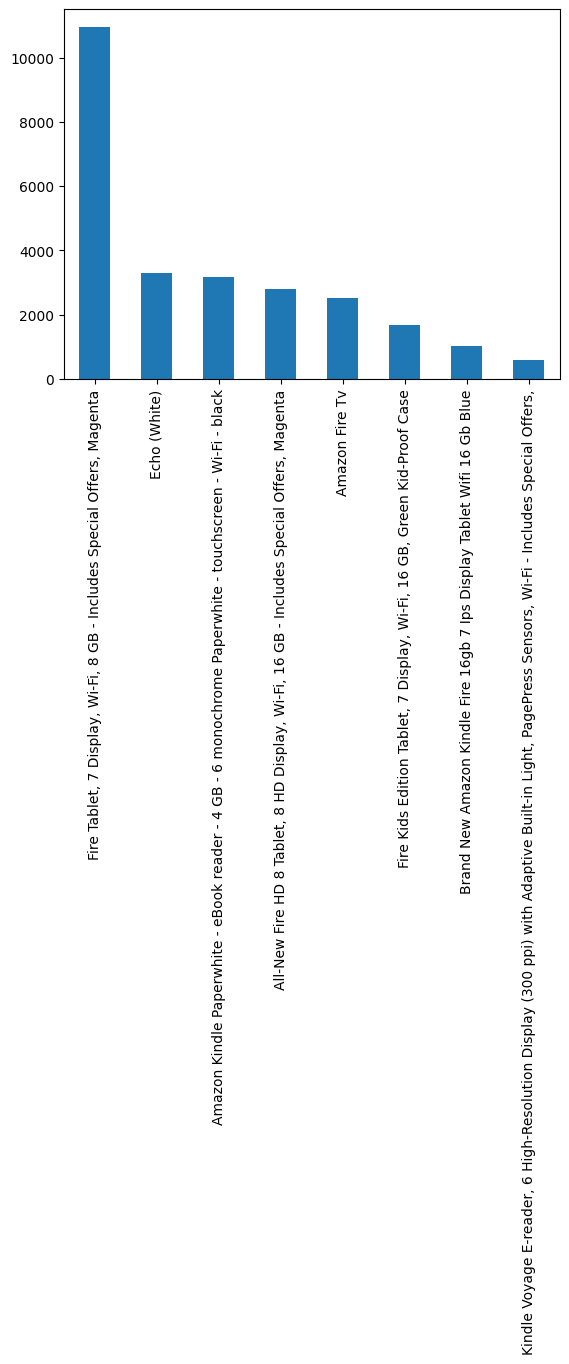

In [ ]:
new_sentiment['name'].value_counts().plot(kind='bar')

### Labelling the sentiments: Polarity score > 0 is positive, < 0 is negative and the rest is neutral